In [1]:
import numpy as np
from random import *

import cupy as cp
# cupy will let us use the GPU to accelerate our calculations, what we reaaallllyyy desire, because
# even with rather small vectors, calculations will take a while here. I had a lot of trouble 
# installing cupy. Eventually, for me "conda install cupy" worked flawlessly.

import time

# Let's look at what we can expect from cupy.

In [2]:
T = []
for k in range(50):
    s = time.time()
    A = np.ones((10000,10000))
    e = time.time()
    T.append(e-s)
print(T)

[0.4019303321838379, 0.7276787757873535, 0.6733987331390381, 0.5320796966552734, 0.5541558265686035, 0.5041983127593994, 0.8346884250640869, 0.34510064125061035, 0.4670875072479248, 0.31865620613098145, 0.4449589252471924, 0.3550751209259033, 0.37262582778930664, 0.4450652599334717, 0.4413759708404541, 0.6239311695098877, 0.4144771099090576, 0.4110896587371826, 0.423846960067749, 0.5255899429321289, 0.5402662754058838, 0.4218482971191406, 0.5111417770385742, 0.5724618434906006, 0.7390244007110596, 0.38764238357543945, 0.5588963031768799, 0.4707527160644531, 0.6915514469146729, 0.6588573455810547, 0.5146236419677734, 0.46264219284057617, 0.867781400680542, 0.46331167221069336, 0.3725454807281494, 0.5006639957427979, 0.5853304862976074, 0.3828451633453369, 0.4607968330383301, 0.3560194969177246, 0.3365333080291748, 0.4087967872619629, 0.3351883888244629, 0.42812514305114746, 0.3480687141418457, 0.4089062213897705, 0.3401157855987549, 0.3271629810333252, 0.5116078853607178, 0.363112688064

In [3]:
T = []
for k in range(50):
    s = time.time()
    A = cp.ones((10000,10000))
    e = time.time()
    T.append(e-s)
print(T)

[0.9708878993988037, 0.11967921257019043, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0009968280792236328, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [4]:
# We can see that numpy takes about the same time for allocating an np.ones Array every time and 
# it takes much more time than cupy at least after the first try. After "warming up", cupy will 
# enhance our velocity hugely!

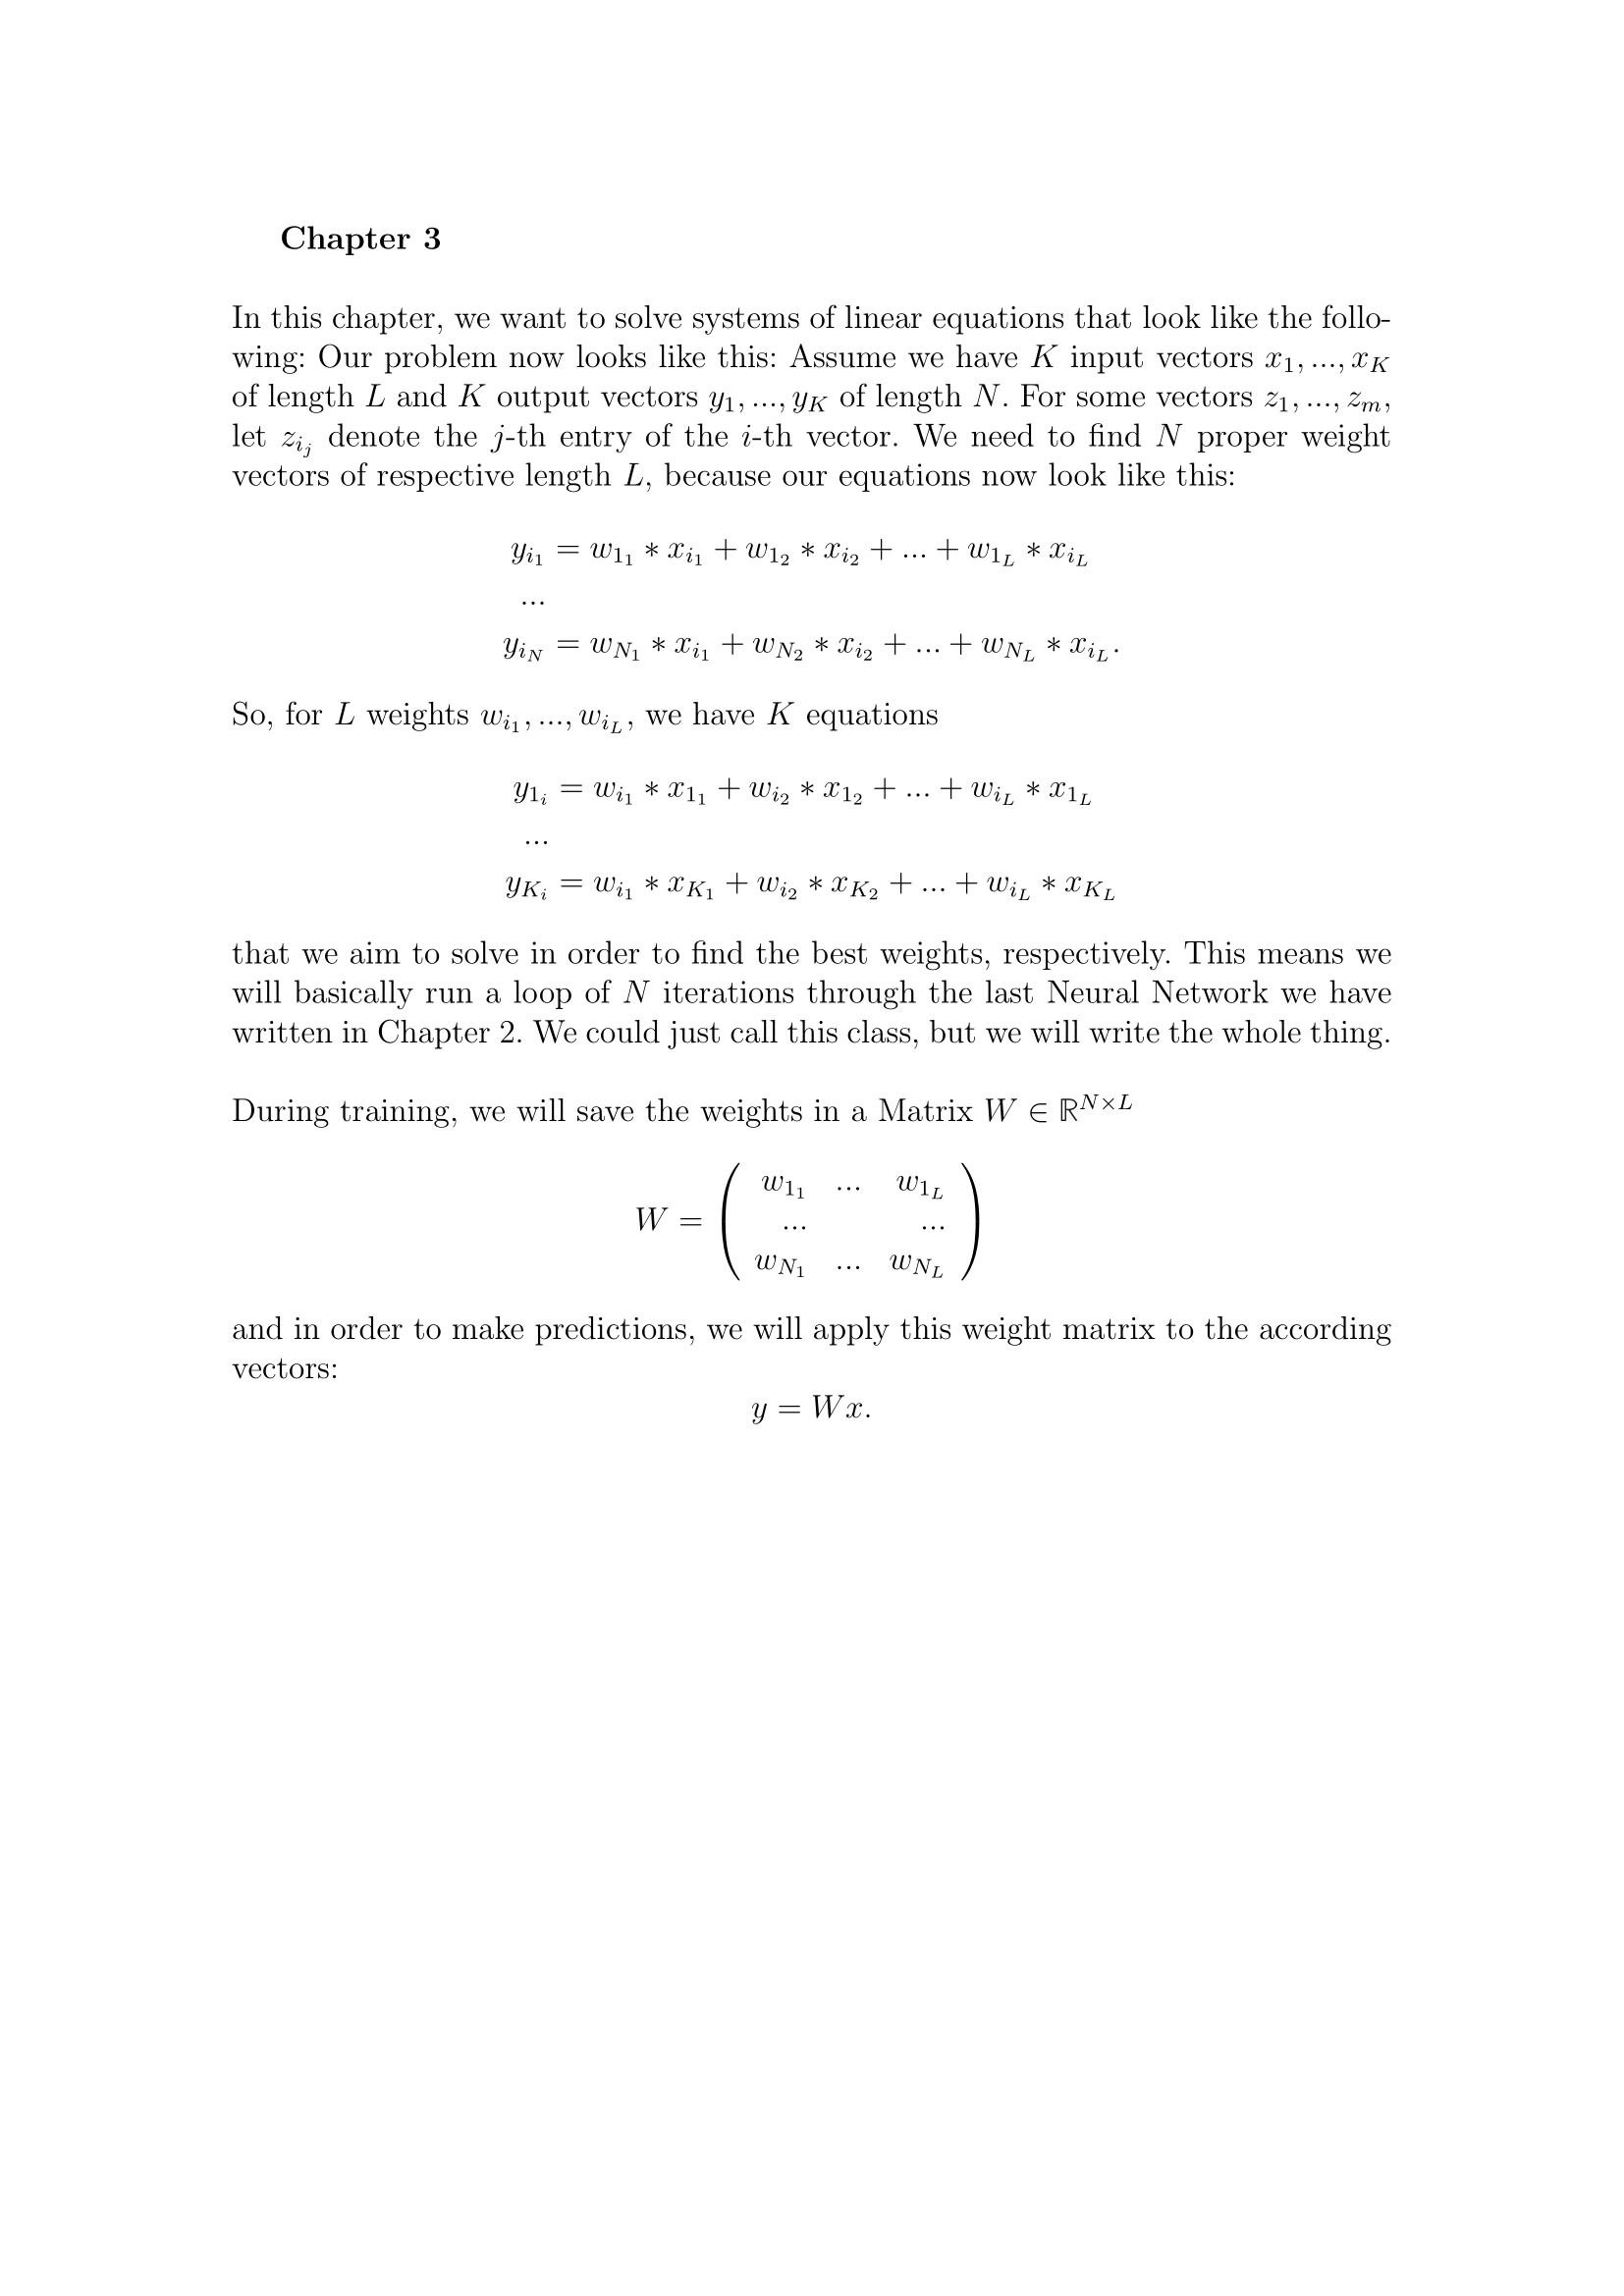

In [5]:
from IPython.display import display
from PIL import Image
img_PIL = Image.open(r'C:\\Users\\User\\Neural Networks\Math explanations\\Chapter 3 Many Associations.png')
display(img_PIL)

In [6]:
class ManyAssociations:
    
   
    def fit(x_train, y_train, learning_rate, tol):
           
        L_K = x_train.shape[0] # = K
        L_L = x_train.shape[1] # = L
        L_N = y_train.shape[1] # = N
        W = cp.zeros((L_N, L_L)) # Initialize the weight matrix so that we can save weights in it later on
        
        for n in range(L_N):
            learning = True
            w = cp.random.rand(L_L) # Create an array of length L_L of random numbers between 0 and 1
            
            while learning:
                # We substituted the loop by a more efficient calculation. "@" is the dot product.
                delta = (x_train @ w - y_train[:,n])
                
                # Again we have substituted a loop very efficiently.
                # Before, we saved the sum ___ delta[j]*x_train[j][i] ___ over j in a vector of zeros.
                # We took the j-th entry of delta and the i-th entry of the j-th train vector and summed
                # their product. "@" does just this.
                grad_E = delta @ x_train
                
                # We also make the next calculation more efficient. Before, it was
                # w_diff = - learning_rate * grad_E and w = w + w_diff
                w = w - learning_rate * grad_E
                
                # We also don't allocate d = np.dot(grad_E, grad_E) and drop the np.sqrt part for the 
                # sake of efficiency. We didn't need the root that much, anyway.
                if (grad_E @ grad_E) < tol: 
                    W[n] = w # save the weights in the k-th row of W
                    learning = False
                  
        ManyAssociations.weights = W
        
# -------------------------------------------------------------------------------------        
    def predict(x_pred):
        preds = []
        for k in range(x_pred.shape[0]):
            preds.append(ManyAssociations.weights @ x_pred[k])
        return cp.array(preds)

In [7]:
K = 7
L = 6
N = 3

X = 10*cp.random.rand(K, L)
Y = 10*cp.random.rand(K, N)

In [8]:
X.shape, Y.shape

((7, 6), (7, 3))

In [9]:
s = time.time()
ManyAssociations.fit(X, Y, 0.001, 0.000001)
e = time.time()

E1 = e-s # Save the time in order to compare it to other times later at the end

In [10]:
ManyAssociations.predict(X) - Y

array([[ 2.61793632e-01,  2.73914476e+00,  7.52076389e-01],
       [-5.76512517e-04, -2.48118500e-03, -4.57157684e-04],
       [-5.21563160e-02, -5.48421309e-01, -1.50748956e-01],
       [-2.77796505e-01, -2.90678422e+00, -7.98117223e-01],
       [ 5.24375817e-02,  5.46163778e-01,  1.49800919e-01],
       [-6.92712555e-02, -7.22191009e-01, -1.98125513e-01],
       [ 1.73405265e-02,  1.81324018e-01,  4.97785058e-02]])

In [11]:
# As comparison, we will also run ManyAssociations with numpy arrays using loops:

In [12]:
class ManyAssociations:
    
    def fit(x_train, y_train, learning_rate, tol):
           
        L_K = x_train.shape[0] # = K
        L_L = x_train.shape[1] # = L
        L_N = y_train.shape[1] # = N
        W = np.zeros((L_N, L_L)) # Initialize the weight matrix so that we can save weights in it later on
        
        for k in range(L_N):
            learning = True
            w = []
            for i in range(L_L):
                w.append(random())
            w = np.array(w)
            
            while learning:
                
                delta = []
                for j in range(L_K):
                    delta.append(np.dot(x_train[j], w) - y_train[j][k])
                delta = np.array(delta)
                
                grad_E = np.zeros(L_L)
                for i in range(L_L):
                    for j in range(len(delta)): 
                    # len(delta) = L_K, of course. But like this, we know better what we are doing
                        grad_E[i] += delta[j]*x_train[j][i] 
                
                w_diff = - learning_rate * grad_E
                w = w + w_diff
                 
                d = np.sqrt(np.dot(grad_E, grad_E))    
                if d < tol: 
                    W[k] = w # save the weights in the k-th row of W
                    learning = False
                  
        ManyAssociations.weights = W
        
# -------------------------------------------------------------------------------------        
    def predict(x_pred):
        preds = []
        for k in range(x_pred.shape[0]):
            preds.append(ManyAssociations.weights @ x_pred[k])
        return np.array(preds)

In [13]:
s = time.time()
ManyAssociations.fit(X.get(), Y.get(), 0.001, 0.000001)
e = time.time()

E2 = e-s

In [14]:
ManyAssociations.weights

array([[ 0.09038374, -0.49631752,  0.37353982,  0.13885951,  1.09525754,
        -0.64310334],
       [ 0.26351611,  0.64655181,  0.54904429, -0.72298413, -0.36289945,
         0.87044623],
       [ 0.19507546,  0.20307332,  0.49025276,  0.98182454, -0.22836915,
        -0.24952482]])

In [15]:
ManyAssociations.predict(X.get()) - Y.get()

array([[ 2.61810280e-01,  2.73912816e+00,  7.52059791e-01],
       [-2.66986305e-04, -2.78973372e-03, -7.65729854e-04],
       [-5.23959050e-02, -5.48182477e-01, -1.50510105e-01],
       [-2.77831739e-01, -2.90674909e+00, -7.98082098e-01],
       [ 5.22238184e-02,  5.46376866e-01,  1.50014025e-01],
       [-6.90495511e-02, -7.22412013e-01, -1.98346535e-01],
       [ 1.73320589e-02,  1.81332459e-01,  4.97869483e-02]])

In [16]:
# And now we will also run ManyAssociations with numpy arrays vectorized:

In [17]:
class ManyAssociations:
    
   
    def fit(x_train, y_train, learning_rate, tol):
           
        L_K = x_train.shape[0]
        L_L = x_train.shape[1]
        L_N = y_train.shape[1] 
        W = np.zeros((L_N, L_L)) 
        
        for n in range(L_N):
            learning = True
            w = np.random.rand(L_L) 
            
            while learning:
               
                delta = (x_train @ w - y_train[:,n])
                grad_E = delta @ x_train
                w = w - learning_rate * grad_E

                if (grad_E @ grad_E) < tol: 
                    W[n] = w 
                    learning = False
                  
        ManyAssociations.weights = W
        
# -------------------------------------------------------------------------------------        
    def predict(x_pred):
        preds = []
        for k in range(x_pred.shape[0]):
            preds.append(ManyAssociations.weights @ x_pred[k])
        return np.array(preds)

In [18]:
s = time.time()
ManyAssociations.fit(X.get(), Y.get(), 0.001, 0.000001)
e = time.time()

E3 = e-s

In [19]:
ManyAssociations.weights

array([[ 0.09042196, -0.49630975,  0.37370589,  0.13885169,  1.09507443,
        -0.64309092],
       [ 0.26347787,  0.64654404,  0.54887814, -0.7229763 , -0.36271626,
         0.8704338 ],
       [ 0.19503729,  0.20306557,  0.49008697,  0.98183235, -0.22818636,
        -0.24953722]])

In [20]:
ManyAssociations.predict(X.get()) - Y.get()

array([[ 2.61793647e-01,  2.73914480e+00,  7.52076397e-01],
       [-5.76233623e-04, -2.48034347e-03, -4.57010684e-04],
       [-5.21565316e-02, -5.48421958e-01, -1.50749070e-01],
       [-2.77796537e-01, -2.90678431e+00, -7.98117239e-01],
       [ 5.24373895e-02,  5.46163202e-01,  1.49800817e-01],
       [-6.92710561e-02, -7.22190409e-01, -1.98125407e-01],
       [ 1.73405192e-02,  1.81323999e-01,  4.97785015e-02]])

In [21]:
print("Cupy time:", E1)
print("Numpy loop time:", E2)
print("Numpy vector time:", E3)

Cupy time: 2.75052547454834
Numpy loop time: 0.9836838245391846
Numpy vector time: 0.12866830825805664


In [22]:
# We obviously see that Cupy falls off very short in contrast to our expectations. In Chapter 3.2
# we will explore methods of speeding this Neural Network up.